In [2]:
%cd "/content/sample_data"

/content/sample_data


In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import time
import gc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
import xgboost
import lightgbm as lgb
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import time
# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
import pandas as pd

train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

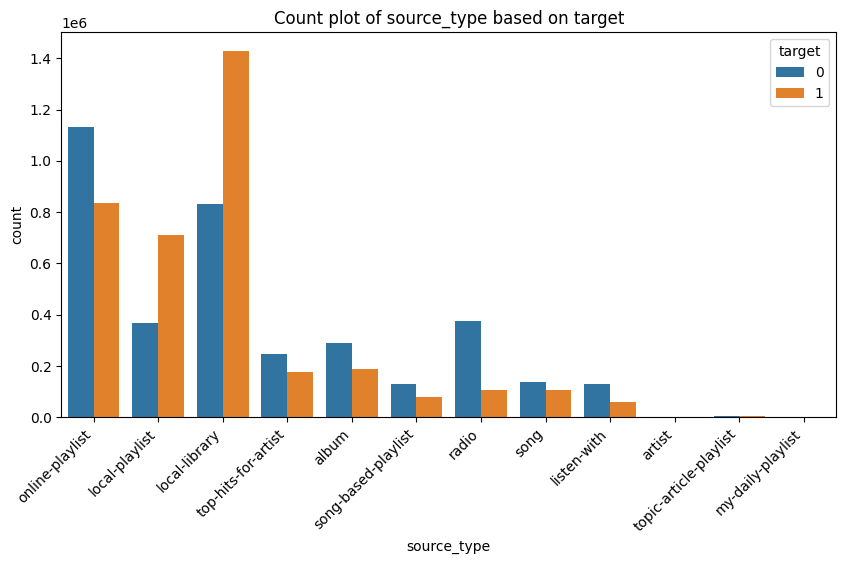

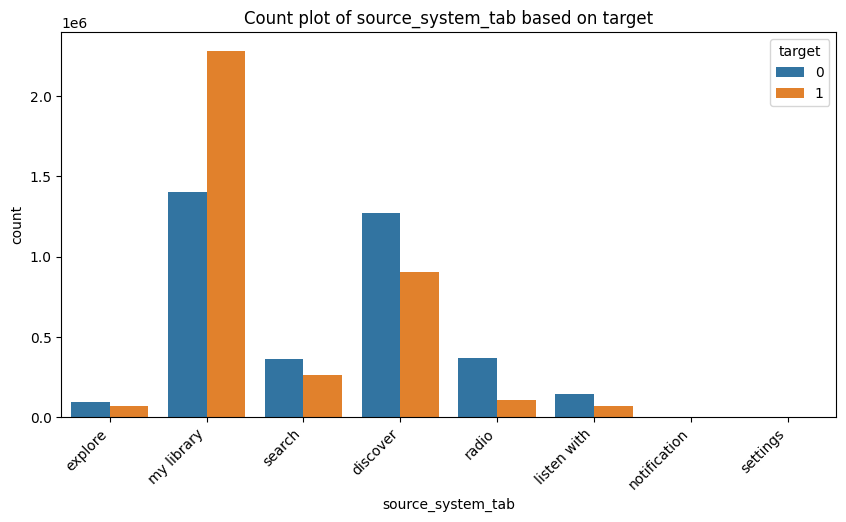

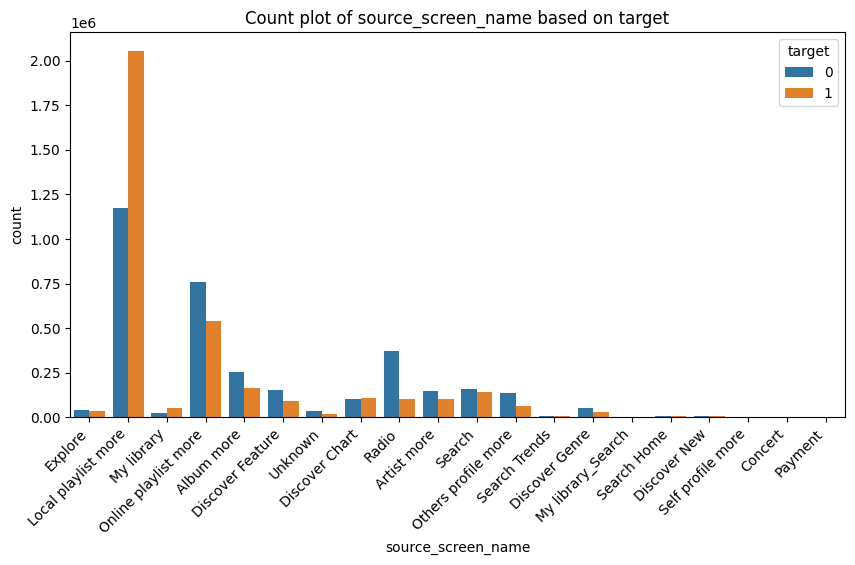

In [5]:
# prompt: count plot for source_type, source_system_tab and source_screen_name based on target

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target' is the column indicating the target variable
for column in ['source_type', 'source_system_tab', 'source_screen_name']:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=column, hue='target', data=train)
  plt.title(f'Count plot of {column} based on target')
  plt.xticks(rotation=45, ha='right')
  plt.show()


<ipython-input-7-2d3408dc4536>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=train, palette='viridis')  # 'viridis' provides a nice color palette
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


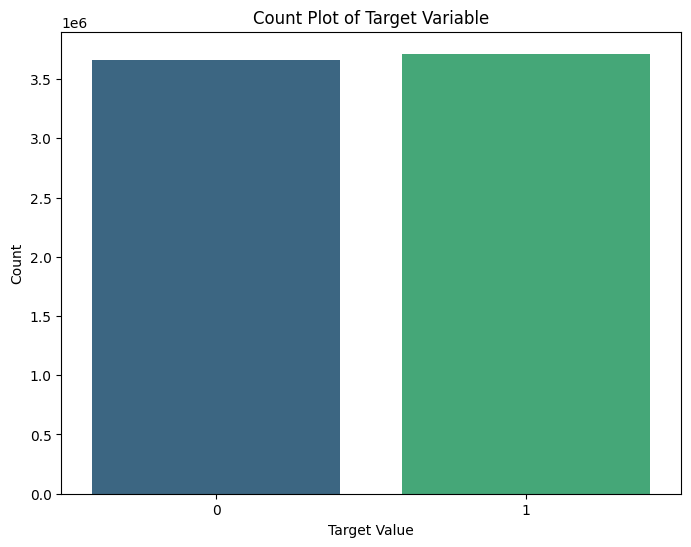

In [ ]:
# prompt: count plot for target with different color for each target value

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train, palette='viridis')  # 'viridis' provides a nice color palette
plt.title('Count Plot of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()


<ipython-input-8-f0bd7475b907>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='registered_via', data=users, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

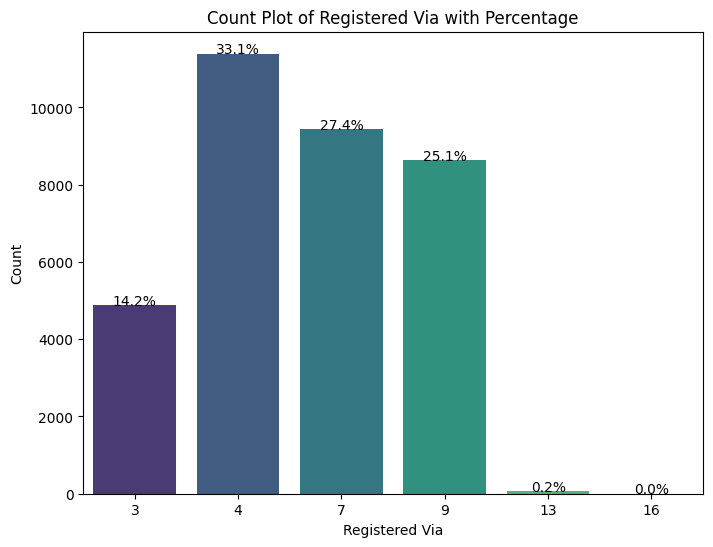

In [ ]:
# prompt: Using users.csv, make a count plot with percentage on y axis for each registered_via value.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'users.csv' is in the same directory as the notebook
users = pd.read_csv('members.csv')

# Calculate the percentage of each registered_via value
registered_via_counts = users['registered_via'].value_counts(normalize=True) * 100

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='registered_via', data=users, palette='viridis')
plt.title('Count Plot of Registered Via with Percentage')
plt.xlabel('Registered Via')
plt.ylabel('Count')

# Add percentage labels to the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 1, '{:.1f}%'.format(height / len(users) * 100), ha="center")


plt.show()


<ipython-input-9-c37805fe0e9d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=songs, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

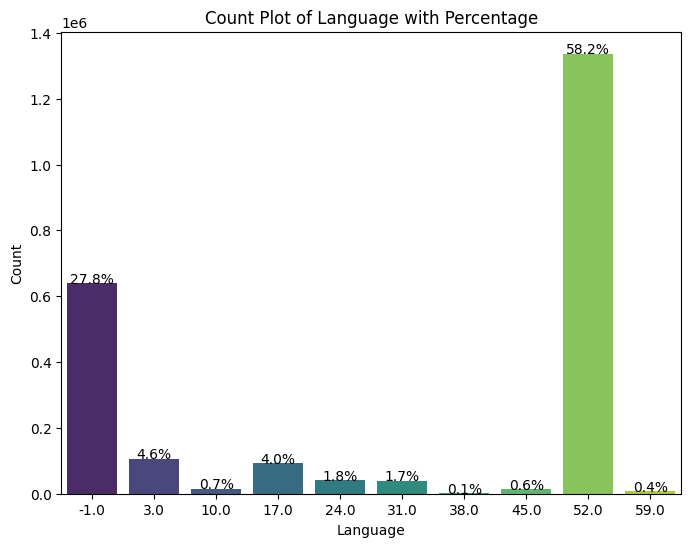

In [ ]:
# prompt: Using songs.csv, make a count plot with percentage on y axis for each language value.

import pandas as pd
import matplotlib.pyplot as plt
songs = pd.read_csv('songs.csv')

# Calculate the percentage of each language value
language_counts = songs['language'].value_counts(normalize=True) * 100

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='language', data=songs, palette='viridis')
plt.title('Count Plot of Language with Percentage')
plt.xlabel('Language')
plt.ylabel('Count')

# Add percentage labels to the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 1, '{:.1f}%'.format(height / len(songs) * 100), ha="center")


plt.show()


# Majority English (58.2%), 4.6% Chinese, 4.0% Japanese, 27.8% instrumental

<ipython-input-10-e52b8f2c8e42>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(songs['song_length'], shade=True)


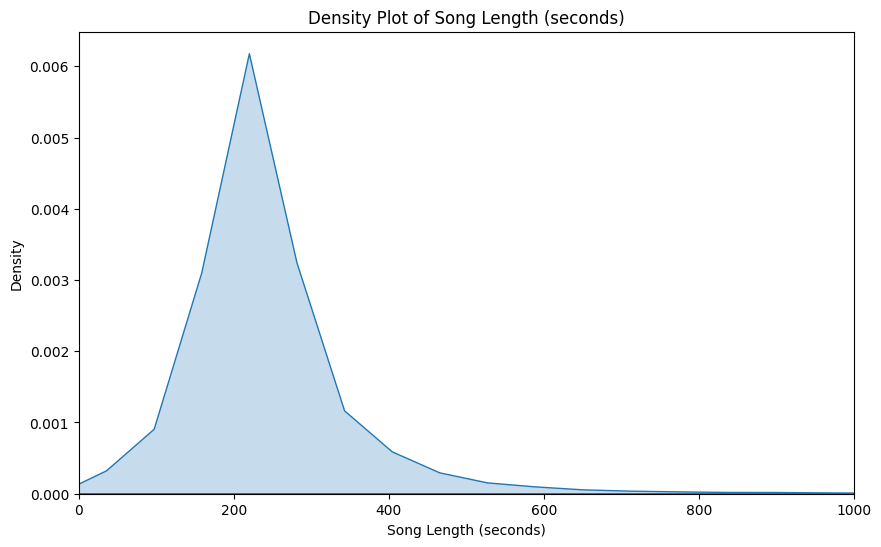

In [ ]:
# prompt: Divide song_lenght in songs.csv by 1000. Make density function for new song_length in songs but dont make the axis unit too large

import pandas as pd
import matplotlib.pyplot as plt
songs = pd.read_csv("songs.csv")
songs['song_length'] = songs['song_length'] / 1000

plt.figure(figsize=(10, 6))
sns.kdeplot(songs['song_length'], shade=True)
plt.title('Density Plot of Song Length (seconds)')
plt.xlabel('Song Length (seconds)')
plt.ylabel('Density')
plt.xlim(0, 1000)  # Adjust the x-axis limit as needed
plt.show()


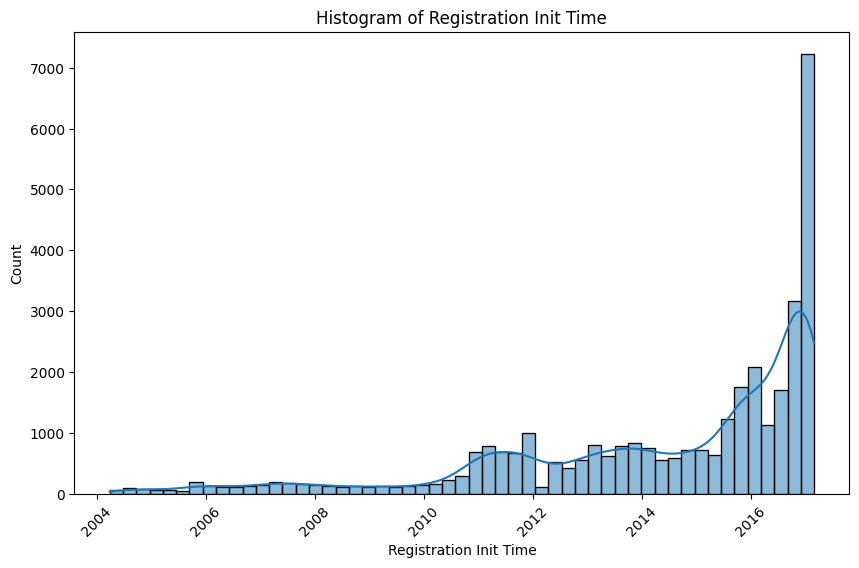

In [ ]:
# prompt: make a probability density function for registration_init_time in users. Overall histogram over it as well

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'registration_init_time' to datetime objects
users['registration_init_time'] = pd.to_datetime(users['registration_init_time'], format='%Y%m%d')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(users['registration_init_time'], kde=True)
plt.title('Histogram of Registration Init Time')
plt.xlabel('Registration Init Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


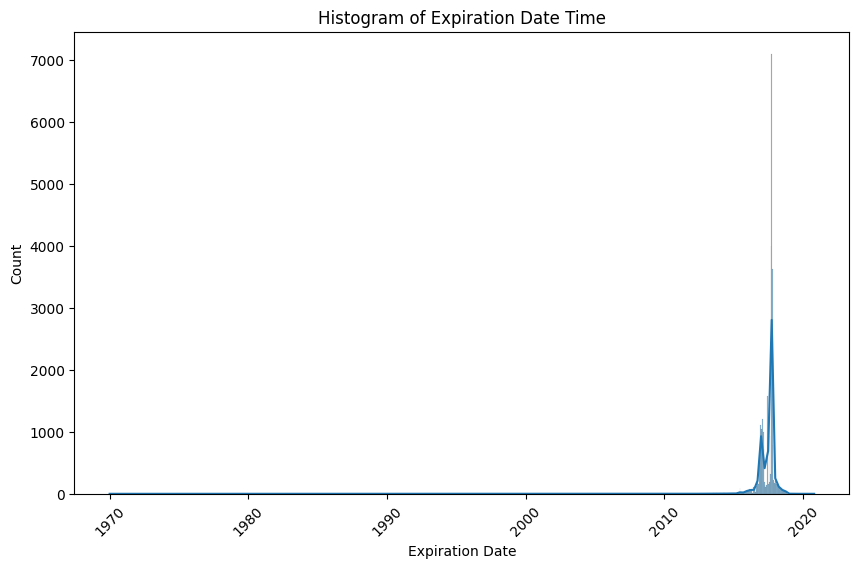

In [ ]:
# maybe an error with data since expiration date can't be less than 2005

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'registration_init_time' to datetime objects
users['expiration_date'] = pd.to_datetime(users['expiration_date'], format='%Y%m%d')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(users['expiration_date'], kde=True)
plt.title('Histogram of Expiration Date Time')
plt.xlabel('Expiration Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


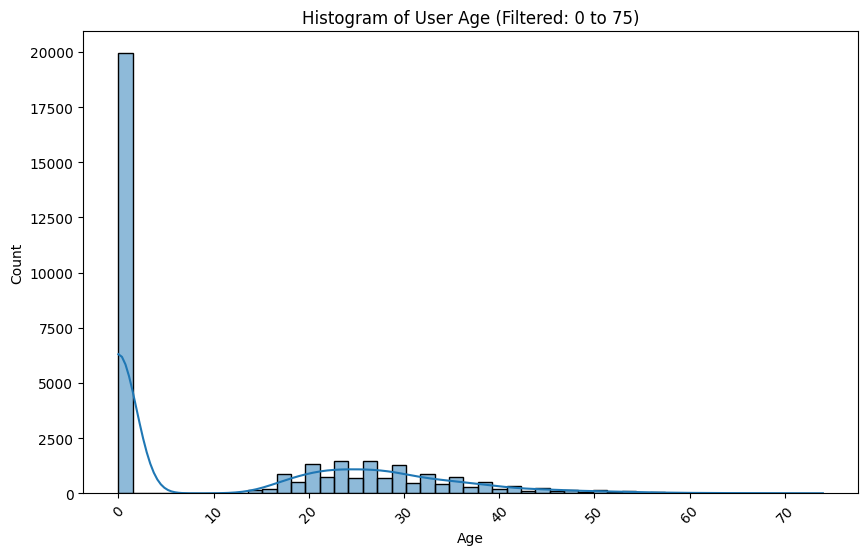

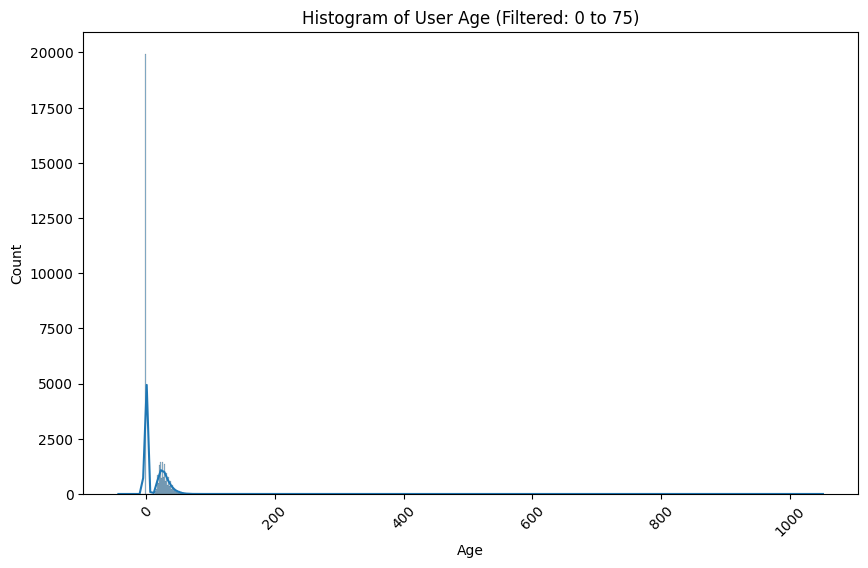

In [ ]:
# Filter users to include only bd values between 0 and 75
filtered_users = users[(users['bd'] >= 0) & (users['bd'] <= 75)]

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_users['bd'], kde=True)
plt.title('Histogram of User Age (Filtered: 0 to 75)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(users['bd'], kde=True)
plt.title('Histogram of User Age (Filtered: 0 to 75)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
song_extra_info = pd.read_csv('song_extra_info.csv')

In [ ]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [ ]:
# prompt: join songs and test on song id inner join

import pandas as pd
# Perform an inner join on 'song_id'
merged_df = pd.merge(songs, train, on='song_id', how='inner')

# Display the merged DataFrame (optional)
print(merged_df.head())


                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
1  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
2  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
3  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
4  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   

        artist_name composer lyricist  language  \
0  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
1  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
2  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
3  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
4  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   

                                           msno source_system_tab  \
0  qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=        my library   
1  VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=        my library   
2  YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+

In [ ]:
# prompt: merged song_extra_info with merged_df on song_id, inner join

import pandas as pd
# Perform an inner join on 'song_id'
merged_df = pd.merge(merged_df, song_extra_info, on='song_id', how='inner')

# Display the merged DataFrame (optional)
print(merged_df.head())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
1  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
2  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
3  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
4  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   

        artist_name composer lyricist  language  \
0  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
1  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
2  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
3  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
4  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   

                                           msno source_system_tab  \
0  qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=        my library   
1  VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=        my library   
2  YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+

In [ ]:
# prompt: merge merged_df with users based on msno, inner join

import pandas as pd
# Perform an inner join on 'msno'
merged_df = pd.merge(merged_df, users, on='msno', how='inner')

# Display the merged DataFrame (optional)
print(merged_df.head())


                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
1  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
2  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
3  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   
4  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247.64       465   

        artist_name composer lyricist  language  \
0  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
1  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
2  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
3  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   
4  張信哲 (Jeff Chang)       董貞      何啟弘       3.0   

                                           msno source_system_tab  \
0  qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=        my library   
1  VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=        my library   
2  YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+

In [ ]:
len(train['song_id'].unique())

359966

In [ ]:
len(songs['song_id'].unique())

2296320

In [ ]:
train[train['song_id'] == 'BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=']

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
35532,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1
39773,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0
95899,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0
137360,hKdGiUKHVqKkXGHLrc+EzdSW6q0ERAJ2Cs7/L1N0Ae4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,NaN,online-playlist,0
...,...,...,...,...,...,...
7132328,Lk0UToUeLSYkRuIZn0oi3acZp4pklkywNGLEBKRO++w=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0
7247033,q00NnZSmIltLiXDL04zVoJcX6k5j+fgz9qzVAJvXm6A=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,song-based-playlist,0
7263586,hbiDVON3wLLm4zxxDhe4uPlHAASAalkd4ZRpfkP/xyU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1
7270117,wOP2RYdLECfcc07RHA+2tQf/PN11lfOWay4y1zY1H9s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1


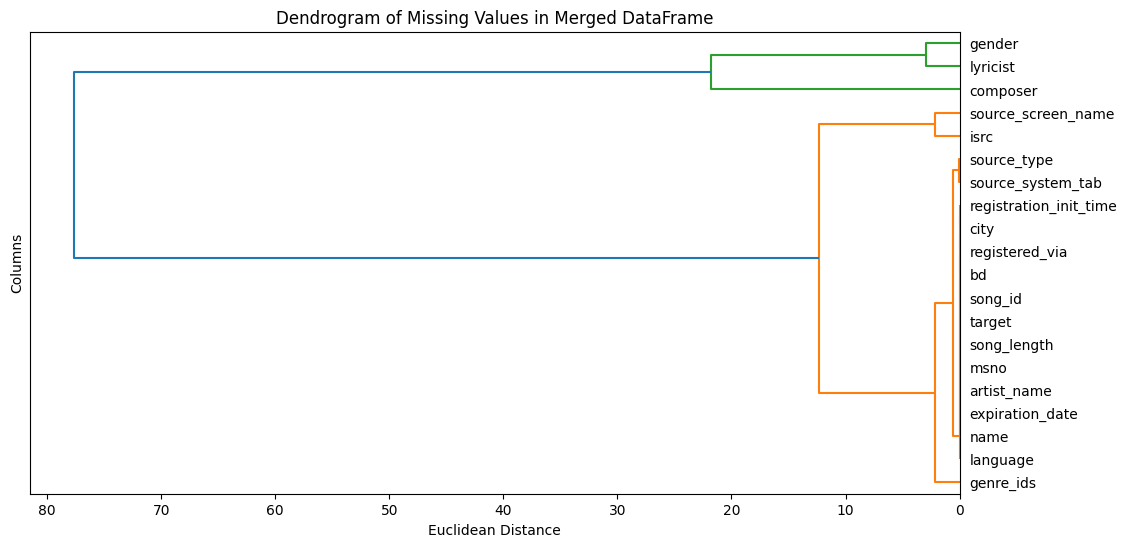

In [ ]:
# prompt: make a dendogram for missing numbers in merged_df

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'merged_df' is your DataFrame
# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100

# Create a new DataFrame with missing value percentages
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort by missing percentage in descending order
missing_df = missing_df.sort_values('Missing Percentage', ascending=False)

# Perform hierarchical clustering on the missing value percentages
mergings = linkage(missing_df[['Missing Percentage']], method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(mergings, labels=missing_df['Column'].tolist(), orientation='left', leaf_font_size=10)
plt.title('Dendrogram of Missing Values in Merged DataFrame')
plt.xlabel('Euclidean Distance')
plt.ylabel('Columns')
plt.show()


In [ ]:
merged_df


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,msno,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,0,焚情,TWB531410010,1,0,NaN,9,2014-11-25,2018-04-17
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,1,焚情,TWB531410010,1,0,NaN,7,2011-07-05,2017-10-05
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,0,焚情,TWB531410010,15,0,NaN,3,2013-10-30,2017-06-09
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,1,焚情,TWB531410010,1,0,NaN,7,2011-08-31,2017-09-08
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,0,焚情,TWB531410010,5,35,female,3,2013-05-05,2019-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375844,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156.410,958,Klaus Thunemann,NaN,NaN,-1.0,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,discover,Album more,album,0,Sonata for Bassoon and Basso continuo in C Ma...,USA371642377,13,43,female,9,2006-05-22,2017-10-22
7375845,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310.308,1609,Internet Famous,NaN,NaN,52.0,rUA3gSrSRvhrRhTbi3kweZ0jV1WaVPbH853m+aEAUwI=,search,Album more,album,0,Don't Be Shy,AUXL31600230,1,0,NaN,7,2011-01-04,2017-09-19
7375846,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218.618,465,Luckys Musicbox Online,Sahm,NaN,52.0,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,my library,Album more,album,0,Mendocino,DER820560006,1,0,NaN,7,2016-11-28,2017-09-30
7375847,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360.176,1609,Sammy Porter feat. Grace Fleary,NaN,NaN,52.0,luusCpzJNvK1VeEQyyqvTHud48A/QSOuoiJE7NtvrRI=,my library,NaN,song,0,True Colours,GB8KE1650547,13,0,NaN,9,2015-09-27,2017-10-04


In [ ]:
# prompt: drop lyricist column in merged_df

merged_df = merged_df.drop('lyricist', axis=1)


In [ ]:
# prompt: find percentage of Nan for each column in merged_df

# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100

# Print the percentage of NaN values for each column
print(missing_percentage)


song_id                    0.000000
song_length                0.000000
genre_ids                  1.604385
artist_name                0.000000
composer                  22.710945
language                   0.000488
msno                       0.000000
source_system_tab          0.336815
source_screen_name         5.622417
source_type                0.291966
target                     0.000000
name                       0.000027
isrc                       7.814612
city                       0.000000
bd                         0.000000
gender                    40.141860
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [ ]:
def filling_missing_values(data):
  '''Filling missing values'''

  data['source_system_tab'].fillna('no_system_tab', inplace=True)
  data['source_screen_name'].fillna('no_screen_name', inplace=True)
  data['source_type'].fillna('np_source_type', inplace=True)
  data['bd'].fillna(0, inplace=True)
  data['gender'].fillna('gender_missing', inplace=True)
  data['song_length'].fillna(0, inplace=True)
  data['genre_ids'].fillna(0, inplace=True)
  data['artist_name'].fillna('no_artist_name', inplace=True)
  data['name'].fillna('no_name', inplace=True)
  data['composer'].fillna('no_composer', inplace=True)
  return data

In [ ]:
# prompt: drop na values in language

merged_df = merged_df.dropna(subset=['language'])

In [ ]:
merged_df['genre_ids']

,genre_ids
0,465
1,465
2,465
3,465
4,465
...,...
7375844,958
7375845,1609
7375846,465
7375847,1609


In [ ]:
final_df = filling_missing_values(merged_df)

<ipython-input-26-2af33509faf5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['source_system_tab'].fillna('no_system_tab', inplace=True)
<ipython-input-26-2af33509faf5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
def extract_date_fatures(data):
    '''Function to extract features like day, month, year from dates.'''

    # convert into date format
    data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')

    # get membership period from registration and expiration dates
    data['membership_days'] = data['expiration_date'].subtract(data['registration_init_time']).dt.days.astype(int)

    # extract year, month and day from dates
    data['registration_year'] = data['registration_init_time'].dt.year
    data['registration_month'] = data['registration_init_time'].dt.month
    data['registration_day'] = data['registration_init_time'].dt.day
    data['expiration_year'] = data['expiration_date'].dt.year
    data['expiration_month'] = data['expiration_date'].dt.month
    data['expiration_day'] = data['expiration_date'].dt.day
    return data

In [ ]:
final_df = extract_date_fatures(final_df)

In [ ]:
import numpy as np
def generate_genre_ids(data):
  '''Function to sepearate each genre_id and count total number of genre_ids'''

  genre_ids_matrix = np.zeros((data.shape[0], 4))
  for i in range(data.shape[0]):
    ids = str(data['genre_ids'].values[i]).split('|')
    if len(ids) > 2:
      genre_ids_matrix[i, 0] = (ids[0])
      genre_ids_matrix[i, 1] = (ids[1])
      genre_ids_matrix[i, 2] = (ids[2])
    elif len(ids) > 1:
      genre_ids_matrix[i, 0] = (ids[0])
      genre_ids_matrix[i, 1] = (ids[1])
    elif len(ids) == 1:
      genre_ids_matrix[i, 0] = (ids[0])
      genre_ids_matrix[i, 3] = len(ids)

  data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
  data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
  data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
  data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids

  return data

In [ ]:
final_df = generate_genre_ids(final_df)

In [ ]:
def artist_count(x):
  return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

def get_first_artist(x):
  if x.count('and') > 0:
    x = x.split('and')[0]
  if x.count(',') > 0:
    x = x.split(',')[0]
  if x.count(' feat') > 0:
   x = x.split(' feat')[0]
  if x.count('&') > 0:
    x = x.split('&')[0]
  return x.strip()

def calculate_artist_features(data):
  data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
  data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
  return data

In [ ]:
final_df = calculate_artist_features(final_df)

In [ ]:
final_df

,song_id,song_length,genre_ids,artist_name,composer,language,msno,source_system_tab,source_screen_name,source_type,...,registration_day,expiration_year,expiration_month,expiration_day,first_genre_id,second_genre_id,third_genre_id,genre_ids_count,artist_count,first_artist_name
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,...,25,2018,4,17,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang)
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,...,5,2017,10,5,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang)
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,...,30,2017,6,9,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang)
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,...,31,2017,9,8,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang)
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,...,5,2019,4,12,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375844,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156.410,958,Klaus Thunemann,no_composer,-1.0,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,discover,Album more,album,...,22,2017,10,22,958.0,0.0,0.0,1.0,1,Klaus Thunemann
7375845,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310.308,1609,Internet Famous,no_composer,52.0,rUA3gSrSRvhrRhTbi3kweZ0jV1WaVPbH853m+aEAUwI=,search,Album more,album,...,4,2017,9,19,1609.0,0.0,0.0,1.0,1,Internet Famous
7375846,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218.618,465,Luckys Musicbox Online,Sahm,52.0,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,my library,Album more,album,...,28,2017,9,30,465.0,0.0,0.0,1.0,1,Luckys Musicbox Online
7375847,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360.176,1609,Sammy Porter feat. Grace Fleary,no_composer,52.0,luusCpzJNvK1VeEQyyqvTHud48A/QSOuoiJE7NtvrRI=,my library,no_screen_name,song,...,27,2017,10,4,1609.0,0.0,0.0,1.0,2,Sammy Porter


In [ ]:
import numpy as np
import pandas as pd

def calculate_songs_features(data):
    '''Function to extract features from isrc.'''

    # Extract parts of the 'isrc' code
    isrc = data['isrc']
    data['country_code'] = isrc.str.slice(0, 2)
    data['registration_code'] = isrc.str.slice(2, 5)

    # Extract song year and adjust
    data['song_year'] = isrc.str.slice(5, 7).astype(float)
    data['song_year'] = data['song_year'].apply(lambda x: 2000 + x if x < 18 else 1900 + x)

    # Check for NaN in 'country_code' and create 'no_isrc' column
    data['no_isrc'] = data['country_code'].isnull().astype(float)

    return data


In [ ]:
calculate_songs_features(final_df)

,song_id,song_length,genre_ids,artist_name,composer,language,msno,source_system_tab,source_screen_name,source_type,...,first_genre_id,second_genre_id,third_genre_id,genre_ids_count,artist_count,first_artist_name,country_code,registration_code,song_year,no_isrc
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,...,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang),TW,B53,2014.0,0.0
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,...,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang),TW,B53,2014.0,0.0
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,...,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang),TW,B53,2014.0,0.0
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,...,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang),TW,B53,2014.0,0.0
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,...,465.0,0.0,0.0,1.0,1,張信哲 (Jeff Chang),TW,B53,2014.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375844,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156.410,958,Klaus Thunemann,no_composer,-1.0,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,discover,Album more,album,...,958.0,0.0,0.0,1.0,1,Klaus Thunemann,US,A37,2016.0,0.0
7375845,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310.308,1609,Internet Famous,no_composer,52.0,rUA3gSrSRvhrRhTbi3kweZ0jV1WaVPbH853m+aEAUwI=,search,Album more,album,...,1609.0,0.0,0.0,1.0,1,Internet Famous,AU,XL3,2016.0,0.0
7375846,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218.618,465,Luckys Musicbox Online,Sahm,52.0,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,my library,Album more,album,...,465.0,0.0,0.0,1.0,1,Luckys Musicbox Online,DE,R82,2005.0,0.0
7375847,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360.176,1609,Sammy Porter feat. Grace Fleary,no_composer,52.0,luusCpzJNvK1VeEQyyqvTHud48A/QSOuoiJE7NtvrRI=,my library,no_screen_name,song,...,1609.0,0.0,0.0,1.0,2,Sammy Porter,GB,8KE,2016.0,0.0


In [ ]:
# prompt: if there is no country code fill no_country_code. Do the same for registration code and song_year. No function

final_df['country_code'].fillna('no_country_code', inplace=True)
final_df['registration_code'].fillna('no_registration_code', inplace=True)
final_df['song_year'].fillna('no_song_year', inplace=True)


<ipython-input-39-26b59c8b19c5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['country_code'].fillna('no_country_code', inplace=True)
<ipython-input-39-26b59c8b19c5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# prompt: return first row of final_df

first_row = final_df.iloc[0]
print(first_row)


song_id                   CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=
song_length                                                     247.64
genre_ids                                                          465
artist_name                                           張信哲 (Jeff Chang)
composer                                                            董貞
language                                                           3.0
msno                      qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=
source_system_tab                                           my library
source_screen_name                                 Local playlist more
source_type                                              local-library
target                                                               0
name                                                                焚情
isrc                                                      TWB531410010
city                                                                 1
bd    

In [ ]:
def calculate_groupby_features(data):

      '''Function to calculate group by features on dataframe '''
      # song count for each user
      member_song_count = data.groupby('msno').count()['song_id'].to_dict()
      data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

      # song count for each artist
      artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
      data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])


      first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
      data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

      # song count for each lanugage
      lang_song_count = data.groupby('language').count()['song_id'].to_dict()
      data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

      # user count for each song
      song_member_count = data.groupby('song_id').count()['msno'].to_dict()
      data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[
      x])

      # We can add group by wrt 'age'
      age_song_count = data.groupby('bd').count()['song_id'].to_dict()
      data['age_song_count'] = data['bd'].apply(lambda x: age_song_count[x])

      return data

In [ ]:
calculate_groupby_features(final_df)

,song_id,song_length,genre_ids,artist_name,composer,language,msno,source_system_tab,source_screen_name,source_type,...,country_code,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=,my library,Local playlist more,local-library,...,TW,B53,2014.0,0.0,1027,5200,3813963,4044455,10,2939826
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,VkQT93ug8I5F2oP6EpLCq5g2eqn5CD/uMnEFlRcGIF4=,my library,Local playlist more,local-library,...,TW,B53,2014.0,0.0,317,5200,3813963,4044455,10,2939826
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,YRYwu93fA3tqG2798IRr6nhK8wqTl6lMKrg84+8jBR0=,discover,Online playlist more,online-playlist,...,TW,B53,2014.0,0.0,309,5200,3813963,4044455,10,2939826
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,my library,Online playlist more,online-playlist,...,TW,B53,2014.0,0.0,425,5200,3813963,4044455,10,2939826
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247.640,465,張信哲 (Jeff Chang),董貞,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,my library,Local playlist more,local-playlist,...,TW,B53,2014.0,0.0,115,5200,3813963,4044455,10,112504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375844,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156.410,958,Klaus Thunemann,no_composer,-1.0,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,discover,Album more,album,...,US,A37,2016.0,0.0,3238,19,56561,308497,1,35287
7375845,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310.308,1609,Internet Famous,no_composer,52.0,rUA3gSrSRvhrRhTbi3kweZ0jV1WaVPbH853m+aEAUwI=,search,Album more,album,...,AU,XL3,2016.0,0.0,624,4,328958,1864413,1,2939826
7375846,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218.618,465,Luckys Musicbox Online,Sahm,52.0,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,my library,Album more,album,...,DE,R82,2005.0,0.0,525,18,3813963,1864413,1,2939826
7375847,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360.176,1609,Sammy Porter feat. Grace Fleary,no_composer,52.0,luusCpzJNvK1VeEQyyqvTHud48A/QSOuoiJE7NtvrRI=,my library,no_screen_name,song,...,GB,8KE,2016.0,0.0,884,1,328958,1864413,1,2939826


In [ ]:
final_df.iloc[0]

,0
song_id,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=
song_length,247.64
genre_ids,465
artist_name,張信哲 (Jeff Chang)
composer,董貞
language,3.0
msno,qdYIsQjR8AMhKuJaC0T+Quuqaj9nWTOcbd8ydI0/jiA=
source_system_tab,my library
source_screen_name,Local playlist more
source_type,local-library


In [ ]:
final_df.isnull().any()

,0
song_id,False
song_length,False
genre_ids,False
artist_name,False
composer,False
language,False
msno,False
source_system_tab,False
source_screen_name,False
source_type,False


In [ ]:
final_df.count()

,0
song_id,7375813
song_length,7375813
genre_ids,7375813
artist_name,7375813
composer,7375813
language,7375813
msno,7375813
source_system_tab,7375813
source_screen_name,7375813
source_type,7375813


In [ ]:
# prompt: drop isrc from final_df

final_df = final_df.drop('isrc', axis=1)


In [ ]:
# prompt: merge test.csv with songs on song id then that merged dataframe with song_extra_info on song id then that merged dataframe with members.csv on msno

import pandas as pd
# Perform an inner join on 'song_id' between test and songs
merged_test_df = pd.merge(test, songs, on='song_id', how='inner')

# Perform an inner join on 'song_id' between the merged dataframe and song_extra_info
merged_test_df = pd.merge(merged_test_df, song_extra_info, on='song_id', how='inner')

# Perform an inner join on 'msno' between the merged dataframe and users
merged_test_df = pd.merge(merged_test_df, users, on='msno', how='inner')

# Display the merged DataFrame (optional)
print(merged_test_df.head())


   id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  song_length genre_ids  \
0  Local playlist more        local-library      224.130       458   
1  Local playlist more        local-library      320.470       465   
2                  NaN  song-based-playlist 

In [ ]:
filling_missing_values(merged_test_df)
extract_date_fatures(merged_test_df)
generate_genre_ids(merged_test_df)
calculate_artist_features(merged_test_df)
calculate_songs_features(merged_test_df)


<ipython-input-26-2af33509faf5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['source_system_tab'].fillna('no_system_tab', inplace=True)
<ipython-input-26-2af33509faf5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,first_genre_id,second_genre_id,third_genre_id,genre_ids_count,artist_count,first_artist_name,country_code,registration_code,song_year,no_isrc
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224.130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,...,458.0,0.0,0.0,1.0,1,梁文音 (Rachel Liang),TW,UM7,2014.0,0.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320.470,465,林俊傑 (JJ Lin),林俊傑,...,465.0,0.0,0.0,1.0,1,林俊傑 (JJ Lin),TW,B67,2010.0,0.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,no_screen_name,song-based-playlist,315.899,2022,Yu Takahashi (高橋優),Yu Takahashi,...,2022.0,0.0,0.0,1.0,1,Yu Takahashi (高橋優),JP,WP0,2010.0,0.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285.210,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,...,465.0,0.0,0.0,1.0,1,U2,GB,AAN,2002.0,0.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197.590,873,Yoga Mr Sound,Neuromancer,...,873.0,0.0,0.0,1.0,1,Yoga Mr Sound,IT,O10,2011.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555989,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist,247.640,1609,The Chainsmokers & Coldplay,Andrew Taggart| Christopher Martin| Will Champ...,...,1609.0,0.0,0.0,1.0,2,The Chainsmokers,US,QX9,2017.0,0.0
2555990,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,no_screen_name,online-playlist,197.067,458,郭美美 (Jocie Guo),小路,...,458.0,0.0,0.0,1.0,1,郭美美 (Jocie Guo),CN,Z17,2016.0,0.0
2555991,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,no_screen_name,online-playlist,212.950,458,問樂團 (Guess What),Skot Suyama陶山/Linkin Park,...,458.0,0.0,0.0,1.0,1,問樂團 (Guess What),TW,CE3,2016.0,0.0
2555992,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,no_screen_name,online-playlist,164.414,465,陳冠宇 (Kaiel Chen),no_composer,...,465.0,0.0,0.0,1.0,1,陳冠宇 (Kaiel Chen),TW,N71,2017.0,0.0


In [ ]:
merged_test_df = merged_test_df.dropna(subset=['language'])
calculate_groupby_features(merged_test_df)

<ipython-input-41-a7a067b8d9c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])
<ipython-input-41-a7a067b8d9c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])
<ipython-input-41-a7a067b8d9c8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,country_code,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224.130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,...,TW,UM7,2014.0,0.0,17,4009,384863,1311283,196,1042868
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320.470,465,林俊傑 (JJ Lin),林俊傑,...,TW,B67,2010.0,0.0,17,31571,1248046,1311283,1479,1042868
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,no_screen_name,song-based-playlist,315.899,2022,Yu Takahashi (高橋優),Yu Takahashi,...,JP,WP0,2010.0,0.0,1,149,56519,84191,2,1042868
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285.210,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,...,GB,AAN,2002.0,0.0,270,225,1248046,708676,14,68219
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197.590,873,Yoga Mr Sound,Neuromancer,...,IT,O10,2011.0,0.0,270,80,2892,116743,3,68219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555989,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist,247.640,1609,The Chainsmokers & Coldplay,Andrew Taggart| Christopher Martin| Will Champ...,...,US,QX9,2017.0,0.0,118,14520,121760,708676,2647,17040
2555990,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,no_screen_name,online-playlist,197.067,458,郭美美 (Jocie Guo),小路,...,CN,Z17,2016.0,0.0,132,4549,384863,1311283,2973,82543
2555991,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,no_screen_name,online-playlist,212.950,458,問樂團 (Guess What),Skot Suyama陶山/Linkin Park,...,TW,CE3,2016.0,0.0,132,1230,384863,1311283,1129,82543
2555992,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,no_screen_name,online-playlist,164.414,465,陳冠宇 (Kaiel Chen),no_composer,...,TW,N71,2017.0,0.0,132,1985,1248046,1311283,1690,82543


In [ ]:
# prompt: drop isrc from merged_test_df

merged_test_df = merged_test_df.drop('isrc', axis=1)

In [ ]:
# prompt: drop lyricist from merged_test_df
merged_test_df = merged_test_df.drop('lyricist', axis=1)

NameError: name 'merged_test_df' is not defined

In [ ]:
merged_test_df['country_code'].fillna('no_country_code', inplace=True)
merged_test_df['registration_code'].fillna('no_registration_code', inplace=True)
merged_test_df['song_year'].fillna('no_song_year', inplace=True)

NameError: name 'merged_test_df' is not defined

In [ ]:
merged_test_df.count()

NameError: name 'merged_test_df' is not defined

In [ ]:
# prompt: output final_df to train_df.csv and merged_test_df to test_df.csv and to my local machine

from google.colab import files

final_df.to_csv('train_df.csv', index=False)
merged_test_df.to_csv('test_df.csv', index=False)

files.download('train_df.csv')
files.download('test_df.csv')


NameError: name 'final_df' is not defined